<a href="https://colab.research.google.com/github/SibeleTatiana/WebAggregat/blob/main/MLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

df = pd.read_csv('/home/winequalityN.csv').dropna()
df


,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.270,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,white,6.3,0.300,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,white,8.1,0.280,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,white,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,white,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6491,red,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6
6492,red,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
6494,red,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
6495,red,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [13]:
#df = df.drop('type', axis=1)
x = df.drop('type', axis=1)
y = df['type']
trainX, testX, trainY, testY = train_test_split(x, y, test_size = 0.2)

sc = StandardScaler()
scaler = sc.fit(trainX)
trainX_scaled = scaler.transform(trainX)
testX_scaled = scaler.transform(testX)



In [14]:
# 'hidden_layer_sizes': [(150,100,50), (120,80,40), (100,50,30)],
# 'max_iter': [50, 100, 150],
# 'activation': ['tanh', 'relu'],
# 'solver': ['sgd', 'adam'],
# 'alpha': [0.0001, 0.05],
# 'learning_rate': ['constant','adaptive'],

clf = MLPClassifier(hidden_layer_sizes=(150,100,50),
                        max_iter = 60,
                        activation = 'tanh',
                        alpha = 0.05,
                        solver = 'adam')
clf.fit(trainX_scaled, trainY)


MLPClassifier(activation='tanh', alpha=0.05, hidden_layer_sizes=(150, 100, 50),
              max_iter=6000)

In [15]:
clf = MLPClassifier(hidden_layer_sizes=(150,100,50),
                        max_iter = 30,
                        activation = 'tanh',
                        alpha = 0.05,
                        solver = 'adam')
clf.fit(trainX_scaled, trainY)

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(activation='tanh', alpha=0.05, hidden_layer_sizes=(150, 100, 50),
              max_iter=30)

In [16]:
y_pred = clf.predict(testX_scaled)

print('Accuracy: {:.2f}'.format(accuracy_score(testY, y_pred)))

Accuracy: 1.00


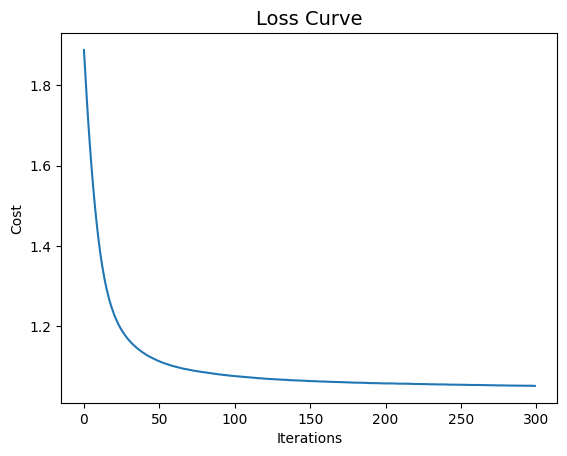

In [ ]:
plt.plot(clf.loss_curve_)
plt.title("Loss Curve", fontsize=14)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.show()